#### Applying PCA on the CIFAR-10 dataset to reduce the dimensionality of the images and use the reduced dimension data for classification. For classification, you can use any classification architecture you have built so far for any assignment. However, make sure you can compare and contrast the performance of the same architecture when you use the classifier on original data vs. on reduced dimensional data. The comparisons can be done using metrics such as accuracy, errors, training-testing time, etc.

Importing the dataset and splitting in train and test:

In [88]:
(train_images, train_labels), (test_images,test_labels) = cifar10.load_data()

In [89]:
print(f"Shape of Training Images: {train_images.shape}")
print(f"Shape of Training Labels: {train_labels.shape}")
print(f"Shape of Testing Images: {test_images.shape}")
print(f"Shape of Testing Labels: {test_labels.shape}")

Shape of Training Images: (50000, 32, 32, 3)
Shape of Training Labels: (50000, 1)
Shape of Testing Images: (10000, 32, 32, 3)
Shape of Testing Labels: (10000, 1)


Unique Labels in the dataset:

In [90]:
labels = ['airplane',
                   'automobile',
                   'bird',
                   'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Plotting a few of the images:

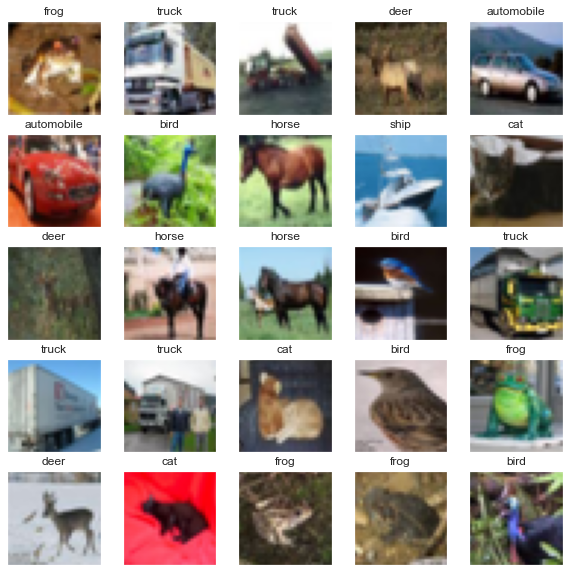

In [91]:
fig, axes = plt.subplots(ncols=5, nrows=5, figsize=(10, 10))
index = 0
for i in range(5):
    for j in range(5):
        axes[i,j].set_title(labels[train_labels[index][0]]) 
        axes[i,j].imshow(train_images[index])
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()

Performing preprocessing:

In [92]:
#converting the pixels data to float data
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

#standardizing the data, 255 being the brightest pixel
train_images = train_images/255
test_images = test_images/255     

#one hot encoding the data for classification tasks
num_classes = 10
train_labels = keras.utils.np_utils.to_categorical(train_labels,num_classes)
test_labels = keras.utils.np_utils.to_categorical(test_labels,num_classes)

Preparing to fit in linear models:

In [93]:
train_images1 = np.reshape(train_images,(train_images.shape[0],-1))
test_images1 = np.reshape(test_images,(test_images.shape[0],-1))
rounded_test_labels = np.argmax(test_labels, axis=1)
rounded_train_labels = np.argmax(train_labels,axis=1)

In [94]:
print(f"Shape of Training Images: {train_images1.shape}")
print(f"Shape of Training Labels: {rounded_train_labels.shape}")
print(f"Shape of Testing Images: {test_images1.shape}")
print(f"Shape of Testing Labels: {rounded_test_labels.shape}")

Shape of Training Images: (50000, 3072)
Shape of Training Labels: (50000,)
Shape of Testing Images: (10000, 3072)
Shape of Testing Labels: (10000,)


Fitting into a pca model to reduce the dimension of the large dataset:

In [95]:
n_components = 150

#t0 = time()
pca = PCA(n_components = n_components, svd_solver ='randomized',whiten = True).fit(train_images1)
#print("done in % 0.3fs" % (time() - t0))

# eigenfaces = pca.components_.reshape((n_components, 32, 32))

# print("Projecting the input data on the eigenfaces orthonormal basis")
#t0 = time()
X_train_pca = pca.transform(train_images1)
X_test_pca = pca.transform(test_images1)
#print("done in % 0.3fs" % (time() - t0))

In [96]:
print("Sample Data point after applying PCA\n", X_train_pca[0])
print("-----------------------------------------------------")
print("Dimensions of training set = % s and Test Set = % s"%(
		train_images1.shape, test_images1.shape))

Sample Data point after applying PCA
 [-0.86028546  0.5895953   0.42062655 -1.1162448  -1.6986018   0.27984416
  0.2503538   0.04572184  1.7409165   0.70612717  0.2610151  -0.00932012
  0.25528774  0.29717925 -0.42399997 -0.52880853 -0.45098755  0.28789276
  0.5858261  -0.5181792  -0.8874038  -1.2083776   0.63798875 -0.83940375
 -1.3627334   0.94187206 -0.04251929  1.5120137  -1.0936958   0.17504838
 -0.21733144 -0.03345998 -1.1646434   0.72172356  2.2747653  -0.3703001
  0.5029051  -0.70279264  1.3975691  -0.5184675   0.6537696  -1.0771443
 -0.31934157 -0.30059472 -0.39595082 -0.0800513   0.10928711 -0.5685314
 -1.4673444   1.4067335  -0.9359619  -1.0516528  -0.2903858   0.66017526
  0.26460975 -0.9588235  -0.87340426  1.3205427   0.9009125   0.13367958
 -0.6834985  -1.5073234   0.88044345  0.16237752  0.14534594  1.4828728
 -1.4201955  -0.19448781  0.25785622 -0.18206614 -0.04837828 -0.53821445
 -0.81478304 -0.43775925 -0.43425065  0.07201383 -0.11028367 -0.87067235
  0.23344219 -0.4

In [97]:
print("Dimensions of training set after PCA = % s and Test Set = % s"%(X_train_pca.shape, X_test_pca.shape))

Dimensions of training set after PCA = (50000, 150) and Test Set = (10000, 150)


##### Making a Neural Network model to fit the reduced data and perform classification:

In [98]:
model_nn = Sequential()

In [99]:
model_nn.add(tf.keras.Input(shape=150))
model_nn.add(Dense(6250,activation='relu'))
model_nn.add(Dense(500,activation='relu'))
model_nn.add(Dense(10,activation='softmax',name='Output_Layer'))

model_nn.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [100]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

Fitting the model:

In [101]:
history = model_nn.fit(X_train_pca, train_labels, batch_size=64, epochs=5,
                    validation_data=(X_test_pca, test_labels),verbose=1,callbacks=[es])

Epoch 1/5
782/782 [==============================] - 22s 28ms/step - loss: 1.5683 - accuracy: 0.4432 - val_loss: 1.3760 - val_accuracy: 0.5135
Epoch 2/5
782/782 [==============================] - 22s 29ms/step - loss: 1.2039 - accuracy: 0.5757 - val_loss: 1.2961 - val_accuracy: 0.5474
Epoch 3/5
782/782 [==============================] - 22s 28ms/step - loss: 0.9856 - accuracy: 0.6507 - val_loss: 1.3169 - val_accuracy: 0.5556
Epoch 4/5
782/782 [==============================] - 22s 29ms/step - loss: 0.7810 - accuracy: 0.7206 - val_loss: 1.3670 - val_accuracy: 0.5575
Epoch 5/5
782/782 [==============================] - 21s 27ms/step - loss: 0.6013 - accuracy: 0.7864 - val_loss: 1.5323 - val_accuracy: 0.5511
Epoch 5: early stopping


###### Calculating scores and accuracy metrics:

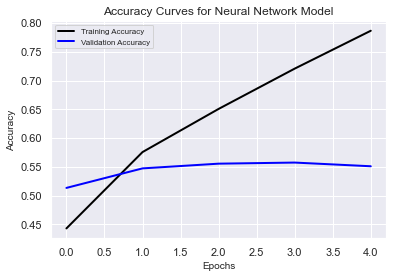

In [102]:
# Accuracy curve
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=8)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves for Neural Network Model', fontsize=12)
plt.show()

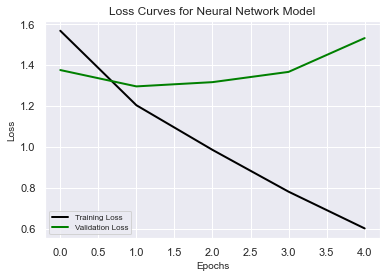

In [103]:
# Loss curve
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=8)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves for Neural Network Model', fontsize=12)
plt.show()

In [104]:
# Making the Predictions
pred_nn = model_nn.predict(X_test_pca)
print(pred_nn)

# Converting the predictions into label index 
pred_classes = np.argmax(pred_nn, axis=1)
print(pred_classes)

[[7.7823247e-04 4.2716376e-02 3.8812496e-02 ... 1.9357656e-05
  1.5974796e-05 6.8752925e-05]
 [5.2125242e-02 1.5862024e-01 1.5120923e-08 ... 3.0371852e-09
  7.8790021e-01 1.3543469e-03]
 [4.0106107e-02 3.9667406e-04 5.5729648e-05 ... 6.1703104e-05
  9.5927781e-01 2.7680997e-05]
 ...
 [6.6301807e-05 7.6697088e-06 9.4985014e-01 ... 7.5935229e-04
  8.8012217e-05 7.7302138e-05]
 [2.3875528e-04 2.1353412e-07 1.4205211e-01 ... 8.0620073e-02
  4.6115056e-07 1.2041661e-06]
 [8.7361106e-05 1.3716536e-05 1.2367408e-03 ... 9.7500014e-01
  1.8007810e-05 5.5294775e-05]]
[3 8 8 ... 2 5 7]


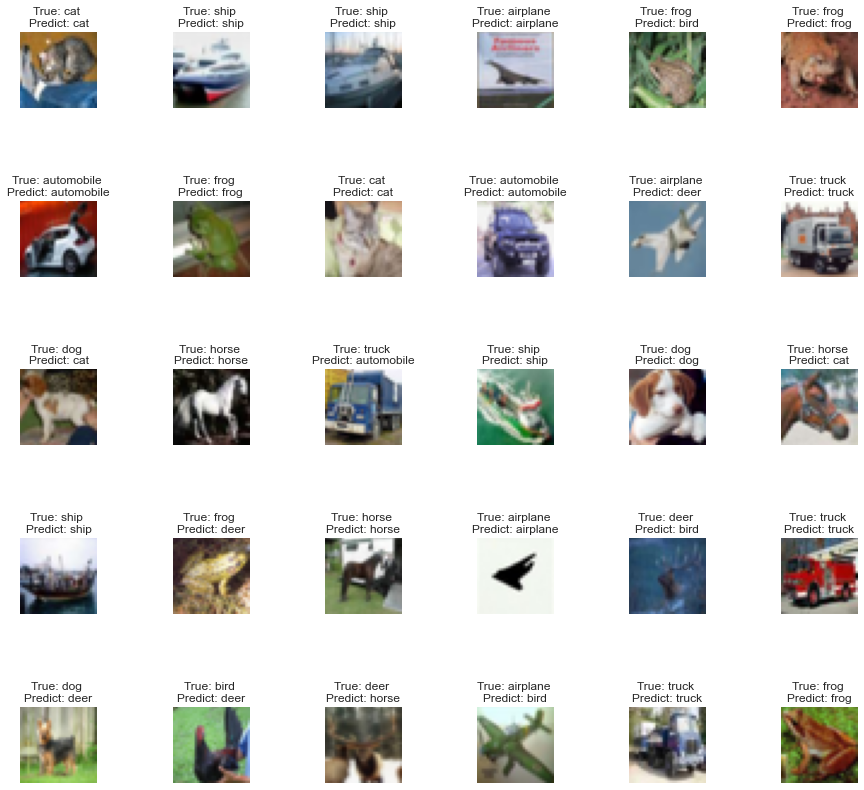

In [105]:
# Plotting the Actual vs. Predicted results (for NN Model)

fig, axes = plt.subplots(5, 6, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 30):
    axes[i].imshow(test_images[i])
    axes[i].set_title("True: %s \nPredict: %s" % (labels[np.argmax(test_labels[i])], labels[pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

In [106]:
score_NN = model_nn.evaluate(X_test_pca,test_labels,verbose = 0)
print(f"Accuracy on test set for Neural Network Model: {score_NN[1]*100}%")

Accuracy on test set for Neural Network Model: 55.11000156402588%


In [107]:
cm_NN = confusion_matrix(rounded_test_labels, pred_classes)
print(f"The confusion matrix for the NN model is:\n{cm_NN}")

The confusion matrix for the NN model is:
[[597  34  56  26  42  13  20  20 150  42]
 [ 36 639  20  26  13  13  21  23  69 140]
 [ 61  17 461  87 127  81  73  57  22  14]
 [ 21  17 114 379  70 183  95  55  25  41]
 [ 28  13 141  76 491  53  71  94  22  11]
 [ 16  10 104 220  60 413  47  94  18  18]
 [  8  15  73 110  96  55 602   9  15  17]
 [ 20  10  56  61  78  92  15 629   7  32]
 [ 75  54  19  33  23   9   7   9 726  45]
 [ 46 170  21  34  18  29  10  38  60 574]]


In [108]:
print(classification_report(rounded_test_labels,pred_classes,target_names=labels))

              precision    recall  f1-score   support

    airplane       0.66      0.60      0.63      1000
  automobile       0.65      0.64      0.65      1000
        bird       0.43      0.46      0.45      1000
         cat       0.36      0.38      0.37      1000
        deer       0.48      0.49      0.49      1000
         dog       0.44      0.41      0.43      1000
        frog       0.63      0.60      0.61      1000
       horse       0.61      0.63      0.62      1000
        ship       0.65      0.73      0.69      1000
       truck       0.61      0.57      0.59      1000

    accuracy                           0.55     10000
   macro avg       0.55      0.55      0.55     10000
weighted avg       0.55      0.55      0.55     10000



Displaying the Heatmap:


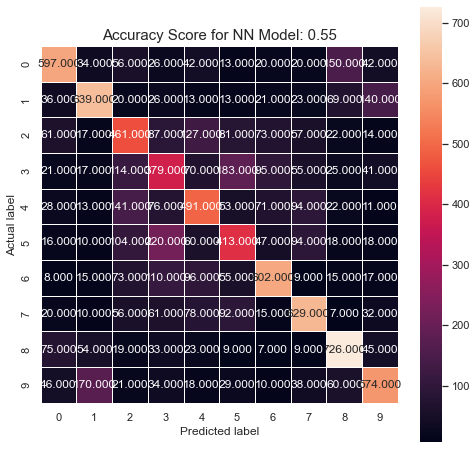

In [109]:
print('Displaying the Heatmap:')
plt.figure(figsize=(8,8))
sns.heatmap(cm_NN, annot=True, fmt=".3f", linewidths=.5, square = True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
title = f'Accuracy Score for NN Model: {round(score_NN[1],2)}'
plt.title(title, size = 15)
plt.show()

In [110]:
TP_nn = cm_NN[0][0]
FP_nn = cm_NN[0][1]
FN_nn = cm_NN[1][0]
TN_nn = cm_NN[1][1]
print(f"The True Postives are NN Model : {TP_nn}")
print(f"The False Postives are NN Model: {FP_nn}")
print(f"The False Negetives are NN Model: {FN_nn}")
print(f"The True Negetives are NN Model: {TN_nn}") 

The True Postives are NN Model : 597
The False Postives are NN Model: 34
The False Negetives are NN Model: 36
The True Negetives are NN Model: 639


##### Making a similar Neural Network model to fit the original data and perform classification:

In [111]:
model_original = Sequential()
model_original.add(tf.keras.Input(shape=(32,32,3)))
model_original.add(Flatten())
model_original.add(Dense(6250,activation='relu',))
model_original.add(Dense(500,activation='relu',))
model_original.add(Dense(10,activation='softmax',name='Output_Layer'))

model_original.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [112]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

Fitting the model:

In [113]:
history_original = model_original.fit(train_images, train_labels, batch_size=64, epochs=5,
                    validation_data=(test_images, test_labels),verbose=1,callbacks=[es])

Epoch 1/5
782/782 [==============================] - 93s 119ms/step - loss: 2.0230 - accuracy: 0.3071 - val_loss: 1.7045 - val_accuracy: 0.3921
Epoch 2/5
782/782 [==============================] - 87s 111ms/step - loss: 1.6789 - accuracy: 0.3963 - val_loss: 1.6110 - val_accuracy: 0.4272
Epoch 3/5
782/782 [==============================] - 86s 110ms/step - loss: 1.5857 - accuracy: 0.4319 - val_loss: 1.5402 - val_accuracy: 0.4421
Epoch 4/5
782/782 [==============================] - 86s 110ms/step - loss: 1.5267 - accuracy: 0.4555 - val_loss: 1.5177 - val_accuracy: 0.4570
Epoch 5/5
782/782 [==============================] - 86s 110ms/step - loss: 1.4803 - accuracy: 0.4713 - val_loss: 1.5281 - val_accuracy: 0.4555


##### Calculating Accuracy Scores and Metrics

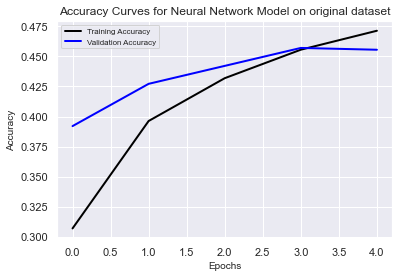

In [114]:
# Accuracy curve
plt.figure(figsize=[6,4])
plt.plot(history_original.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history_original.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=8)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves for Neural Network Model on original dataset', fontsize=12)
plt.show()

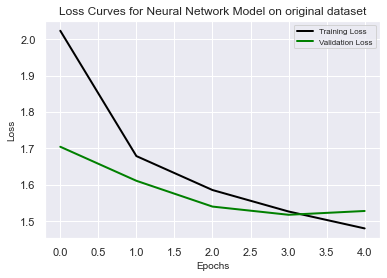

In [115]:
# Loss curve
plt.figure(figsize=[6,4])
plt.plot(history_original.history['loss'], 'black', linewidth=2.0)
plt.plot(history_original.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=8)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves for Neural Network Model on original dataset', fontsize=12)
plt.show()

In [116]:
# Making the Predictions
pred_original = model_original.predict(test_images)
print(pred_original)

# Converting the predictions into label index 
pred_classes_original = np.argmax(pred_original, axis=1)
print(pred_classes_original)

[[2.9570507e-02 5.3904289e-03 1.1465700e-01 ... 4.0964191e-03
  3.7052047e-02 1.8715948e-03]
 [5.4542970e-02 6.2479906e-02 4.0215929e-03 ... 1.3805268e-03
  7.1418458e-01 1.5273660e-01]
 [1.2539865e-01 2.5016740e-02 6.0182526e-03 ... 3.6312311e-03
  7.9336423e-01 3.2571200e-02]
 ...
 [7.9384316e-03 3.6185817e-04 1.4755794e-01 ... 2.2570050e-01
  4.2507900e-03 4.5750490e-03]
 [9.7439401e-03 3.3315457e-03 2.3731053e-01 ... 4.6286985e-02
  3.2631797e-03 5.2935299e-03]
 [4.8076998e-02 3.9494461e-03 1.2325282e-01 ... 4.1492322e-01
  2.3042036e-02 1.0195008e-02]]
[3 8 8 ... 3 4 7]


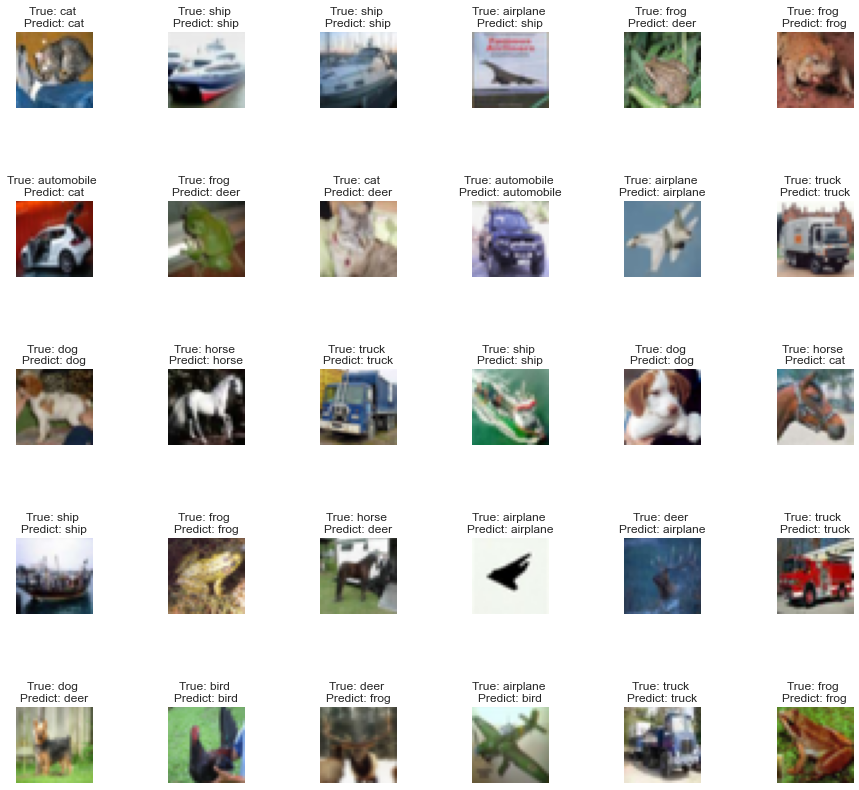

In [117]:
# Plotting the Actual vs. Predicted results (for NN Model)

fig, axes = plt.subplots(5, 6, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 30):
    axes[i].imshow(test_images[i])
    axes[i].set_title("True: %s \nPredict: %s" % (labels[np.argmax(test_labels[i])], labels[pred_classes_original[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

In [118]:
score_original = model_original.evaluate(test_images,test_labels,verbose = 0)
print(f"Accuracy on test set for Neural Network Model on original dataset: {score_original[1]*100}%")

Accuracy on test set for Neural Network Model on original dataset: 45.55000066757202%


In [119]:
print(classification_report(rounded_test_labels,pred_classes_original,target_names=labels))

              precision    recall  f1-score   support

    airplane       0.63      0.45      0.52      1000
  automobile       0.77      0.30      0.43      1000
        bird       0.36      0.30      0.33      1000
         cat       0.30      0.38      0.33      1000
        deer       0.39      0.41      0.40      1000
         dog       0.39      0.35      0.37      1000
        frog       0.45      0.55      0.50      1000
       horse       0.47      0.58      0.52      1000
        ship       0.49      0.73      0.59      1000
       truck       0.55      0.51      0.53      1000

    accuracy                           0.46     10000
   macro avg       0.48      0.46      0.45     10000
weighted avg       0.48      0.46      0.45     10000



In [120]:
cm_original = confusion_matrix(rounded_test_labels, pred_classes_original)
print(f"The confusion matrix for the NN model on the original dataset is:\n{cm_original}")

The confusion matrix for the NN model on the original dataset is:
[[452   2  85  50  42  19  30  51 231  38]
 [ 35 296  26  66  23  25  29  77 195 228]
 [ 54   8 304 139 191  65 114  85  33   7]
 [ 18   3  75 378  48 200 144  76  31  27]
 [ 42   0 116  84 405  61 135 104  44   9]
 [ 17   1  91 234  72 350 100  99  28   8]
 [  1   1  59 118 127  67 552  49  16  10]
 [ 22   1  48  85  73  70  56 581  29  35]
 [ 56  19  24  36  24  22  19  19 732  49]
 [ 25  54   9  78  21  29  41  84 154 505]]


Displaying the Heatmap for the original dataset:


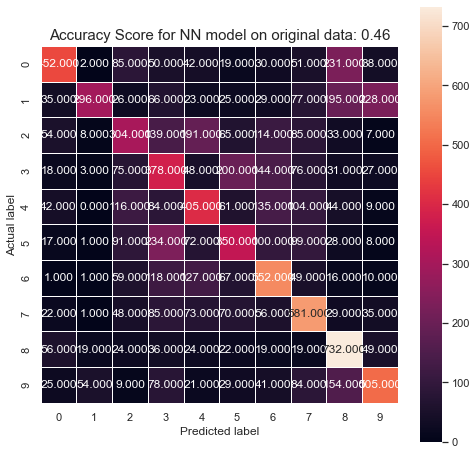

In [121]:
print('Displaying the Heatmap for the original dataset:')
plt.figure(figsize=(8,8))
sns.heatmap(cm_original, annot=True, fmt=".3f", linewidths=.5, square = True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
title = f'Accuracy Score for NN model on original data: {round(score_original[1],2)}'
plt.title(title, size = 15)
plt.show()

In [122]:
TP_original = cm_original[0][0]
FP_original = cm_original[0][1]
FN_original = cm_original[1][0]
TN_original = cm_original[1][1]
print(f"The True Postives are NN Model on original dataset: {TP_original}")
print(f"The False Postives are NN Model on original dataset: {FP_original}")
print(f"The False Negetives are NN Model on original dataset: {FN_original}")
print(f"The True Negetives are NN Model on original dataset: {TN_original}") 

The True Postives are NN Model on original dataset: 452
The False Postives are NN Model on original dataset: 2
The False Negetives are NN Model on original dataset: 35
The True Negetives are NN Model on original dataset: 296


##### Comparing Accuracies and losses of the model with and without the pca dimension reduction

As we can see from the above two models the model fit in with the reduced dataset after fitting into a pca model has more accuracy than the one fitted into the same neural network architecture.:We can also plot their accuracy and loss curves to get a better understanding of the differnce of the two models. 

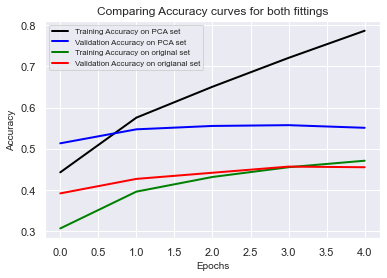

In [123]:
# Accuracy curve
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'blue', linewidth=2.0)
plt.plot(history_original.history['accuracy'], 'green', linewidth=2.0)
plt.plot(history_original.history['val_accuracy'], 'red', linewidth=2.0)
plt.legend(['Training Accuracy on PCA set', 'Validation Accuracy on PCA set',
            'Training Accuracy on original set','Validation Accuracy on origianal set'], fontsize=8)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Comparing Accuracy curves for both fittings', fontsize=12)
plt.show()

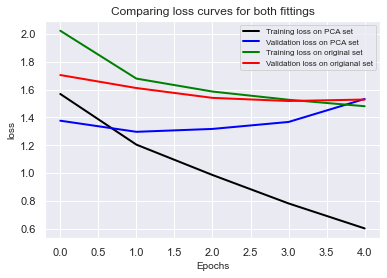

In [124]:
# loss curve
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'blue', linewidth=2.0)
plt.plot(history_original.history['loss'], 'green', linewidth=2.0)
plt.plot(history_original.history['val_loss'], 'red', linewidth=2.0)
plt.legend(['Training loss on PCA set', 'Validation loss on PCA set',
            'Training loss on original set','Validation loss on origianal set'], fontsize=8)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('loss', fontsize=10)
plt.title('Comparing loss curves for both fittings', fontsize=12)
plt.show()